In [1]:
import sys
import numpy as np

In [2]:
sys.path.append("/home/zanardi/Codes/ML/RONEK/ronek/")
from ronek.argon_plasma_new.model import Model

In [3]:
path_to_dtb = "/home/zanardi/Codes/ML/RONEK/ronek/examples/CR_Ar/database"

In [4]:
model = Model(
  species={k: path_to_dtb + "/species/" + k + ".json" for k in ("Ar", "Arp", "em")},
  kin_dtb=path_to_dtb + "/rates/kin_fit.p"
)

In [5]:
p0, T0, T = 1e5, 2e3, 3e4

In [6]:
w, rho = model.mix.get_init_composition(p0, T0, noise=False)
# model.mix.update_composition(w, rho)
# model.mix.update_species_thermo(T, T0)
# model.mix.update_mixture_thermo()

In [7]:
t = np.geomspace(1e-12,1e-2,499)
t = np.insert(t, 0, 0)

In [8]:
y0 = np.concatenate([w, np.array(T).reshape(1), np.array(T0).reshape(1)])
y0, rho

(array([1.00000000e+00, 1.00000000e-25, 1.00000000e-25, 1.00000000e-25,
        1.00000000e-25, 1.00000000e-25, 1.00000000e-25, 1.00000000e-25,
        1.00000000e-25, 1.00000000e-25, 1.00000000e-25, 1.00000000e-25,
        1.00000000e-25, 1.00000000e-25, 1.00000000e-25, 1.00000000e-25,
        1.00000000e-25, 1.00000000e-25, 1.00000000e-25, 1.00000000e-25,
        1.00000000e-25, 1.00000000e-25, 1.00000000e-25, 1.00000000e-25,
        1.00000000e-25, 1.00000000e-25, 1.00000000e-25, 1.00000000e-25,
        1.00000000e-25, 1.00000000e-25, 1.00000000e-25, 8.84715165e-19,
        1.58399245e-19, 1.43246086e-23, 3.00000000e+04, 2.00000000e+03]),
 0.024023200196234096)

In [9]:
model._fun(0.0, y0, rho)

array([-1.93137860e+03,  8.37979574e-18,  3.70465860e+02, -1.63715332e-18,
        1.24292872e+03, -1.46239656e-17,  3.77779944e-15, -2.14803084e-15,
       -3.50305488e-15,  3.74295531e-15, -2.60564090e-14,  1.94260219e-14,
        7.44935358e-15, -2.01852086e-15, -6.16420717e-16, -5.65434619e-15,
        1.53141673e+00,  9.11832052e-16,  1.97621540e-15,  9.17171789e-16,
        1.88219693e-15,  2.66526755e-15,  4.59386136e+01,  2.42296225e-14,
        1.24096758e+02,  1.24246507e-14, -2.35990488e-14,  1.21798430e-12,
       -1.20269983e-12,  2.22226569e+01,  9.54408714e+01,  2.87533066e+01,
        7.73006097e-18,  3.94855886e-04, -1.82326130e+08,  0.00000000e+00])

In [10]:
y = model.solve(t, y0, rho)

In [11]:
y

array([[1.00000000e+00, 9.99999998e-01, 9.99999998e-01, ...,
        9.97094306e-01, 9.97145988e-01, 9.97198215e-01],
       [1.00000000e-25, 2.44157749e-15, 2.67779374e-15, ...,
        1.42098572e-07, 1.39662482e-07, 1.37196928e-07],
       [1.00166402e-25, 3.70458023e-10, 3.87988534e-10, ...,
        5.51049943e-08, 5.41602713e-08, 5.32041221e-08],
       ...,
       [1.43246086e-23, 3.94885124e-16, 4.13573413e-16, ...,
        3.98989148e-08, 3.91892585e-08, 3.84721079e-08],
       [3.00000000e+04, 2.99999998e+04, 2.99999998e+04, ...,
        1.92575546e+03, 1.92726320e+03, 1.92878261e+03],
       [2.00000000e+03, 2.00000000e+03, 2.00000000e+03, ...,
        2.00000000e+03, 2.00000000e+03, 2.00000000e+03]])

In [12]:
import matplotlib.pyplot as plt

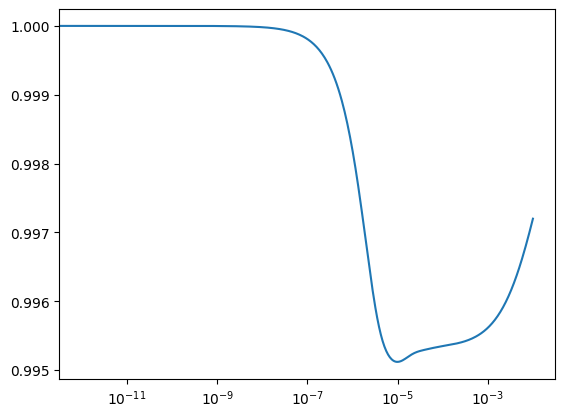

In [15]:
plt.semilogx(t, y[0])